### Problem Statement:
Digital marketing campaigns often struggle to accurately predict which customers will convert, leading to wasted advertising money and missed opportunities. This project aims to build a machine learning model that uses customer data to predict conversions. By identifying likely converters, the model will help improve targeting, reduce costs, and increase the success of marketing efforts.

STEP1: Importing all the required libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,recall_score,accuracy_score,confusion_matrix,classification_report,roc_auc_score,precision_score,roc_curve
import pickle

STEP2: Import CSV data into Pandas Data Frame

In [2]:
df=pd.read_csv(r"C:\Users\Sanjay\OneDrive\BIA_Project\Digital_Marketing\digital_marketing_campaign_dataset.csv")

STEP3: Understanding the Data

In [3]:
df.head() 

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
df.shape

(8000, 20)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [6]:
df.isna().sum() #checking for null-values

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [7]:
# Drop the not required columns 
df.drop(["CustomerID","AdvertisingPlatform","AdvertisingTool"],axis=1,inplace=True)

STEP4: Exploratory Data Analysis

In [8]:
# Statistical analysis of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8000.0,43.625500,14.902785,18.000000,31.000000,43.000000,56.000000,69.000000
Income,8000.0,84664.196750,37580.387945,20014.000000,51744.500000,84926.500000,116815.750000,149986.000000
AdSpend,8000.0,5000.944830,2838.038153,100.054813,2523.221165,5013.440044,7407.989369,9997.914781
ClickThroughRate,8000.0,0.154829,0.084007,0.010005,0.082635,0.154505,0.228207,0.299968
ConversionRate,8000.0,0.104389,0.054878,0.010018,0.056410,0.104046,0.152077,0.199995
WebsiteVisits,8000.0,24.751625,14.312269,0.000000,13.000000,25.000000,37.000000,49.000000
PagesPerVisit,8000.0,5.549299,2.607358,1.000428,3.302479,5.534257,7.835756,9.999055
TimeOnSite,8000.0,7.727718,4.228218,0.501669,4.068340,7.682956,11.481468,14.995311
SocialShares,8000.0,49.799750,28.901165,0.000000,25.000000,50.000000,75.000000,99.000000
EmailOpens,8000.0,9.476875,5.711111,0.000000,5.000000,9.000000,14.000000,19.000000


After analyzing the Describe we can see that MEAN AND MEDIAN doesn't vary, Which implies there is no significant influence of outliers on the central tendency of the data.

In [9]:
# Describe for categorical data
df.describe(include="object") 

,Gender,CampaignChannel,CampaignType
count,8000,8000,8000
unique,2,5,4
top,Female,Referral,Conversion
freq,4839,1719,2077


In [10]:
# counts of campaign Channel
df["CampaignChannel"].value_counts().sort_values(ascending=False)

CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64

In [11]:
# counts of campaign type
df["CampaignType"].value_counts().sort_values(ascending=False)

CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

In [12]:
# count of Gender
df["Gender"].value_counts()

Gender
Female    4839
Male      3161
Name: count, dtype: int64

In [13]:
# percentage of campaign Channel
df["CampaignChannel"].value_counts()/8000*100

CampaignChannel
Referral        21.4875
PPC             20.6875
Email           19.4625
SEO             19.3750
Social Media    18.9875
Name: count, dtype: float64

In [14]:
# percentage of campaign type
df["CampaignType"].value_counts()/8000*100

CampaignType
Conversion       25.9625
Awareness        24.8500
Consideration    24.8500
Retention        24.3375
Name: count, dtype: float64

In [15]:
# calculating ADspend on campaign channel
df.groupby("CampaignChannel")["AdSpend"].sum().sort_values(ascending=False)

CampaignChannel
Referral        8.653519e+06
PPC             8.199237e+06
Email           7.871576e+06
SEO             7.740904e+06
Social Media    7.542323e+06
Name: AdSpend, dtype: float64

In [16]:
# calculating how many percent of conversion from each campaign channel 
pd.crosstab(df['CampaignChannel'], df['Conversion'], normalize = 'index').sort_values(1, ascending = False)

Conversion,0,1
CampaignChannel,,
Referral,0.116928,0.883072
PPC,0.117221,0.882779
SEO,0.123226,0.876774
Email,0.129737,0.870263
Social Media,0.131666,0.868334


In [17]:
# calculating how many percent of conversion from campaign type
pd.crosstab(df['CampaignType'], df['Conversion'], normalize = 'index').sort_values(1, ascending = False)


Conversion,0,1
CampaignType,,
Conversion,0.066442,0.933558
Retention,0.141757,0.858243
Consideration,0.144366,0.855634
Awareness,0.144366,0.855634


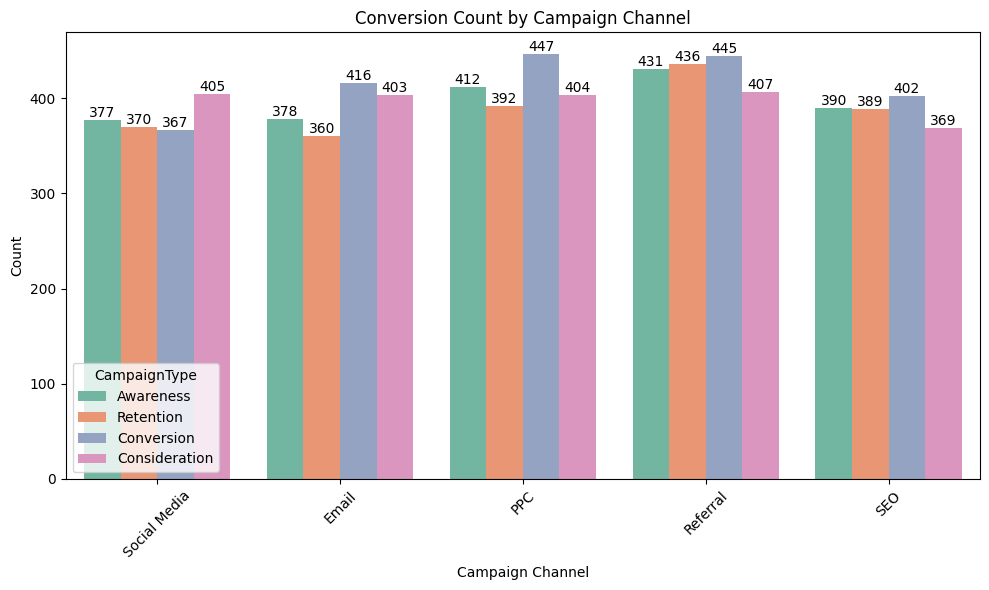

In [18]:
# visualize Conversion count by campaign channel
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CampaignChannel', hue='CampaignType', data=df, palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Conversion Count by Campaign Channel')
plt.xlabel('Campaign Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


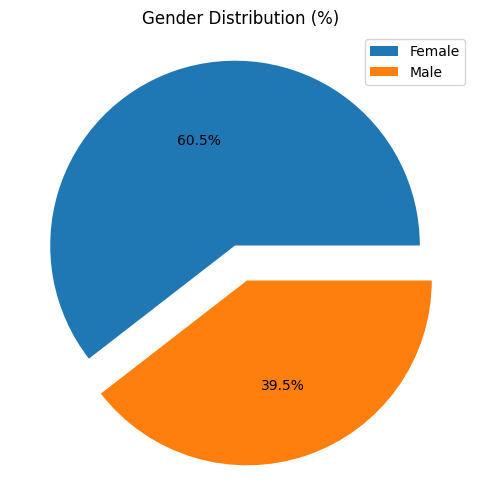

In [19]:
gender_counts = df['Gender'].value_counts()

# Plot pie chart for Gender 
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    explode=[0.1]*len(gender_counts),       
    autopct='%1.1f%%'
)

plt.title('Gender Distribution (%)')
plt.legend(df["Gender"].unique())
plt.show()

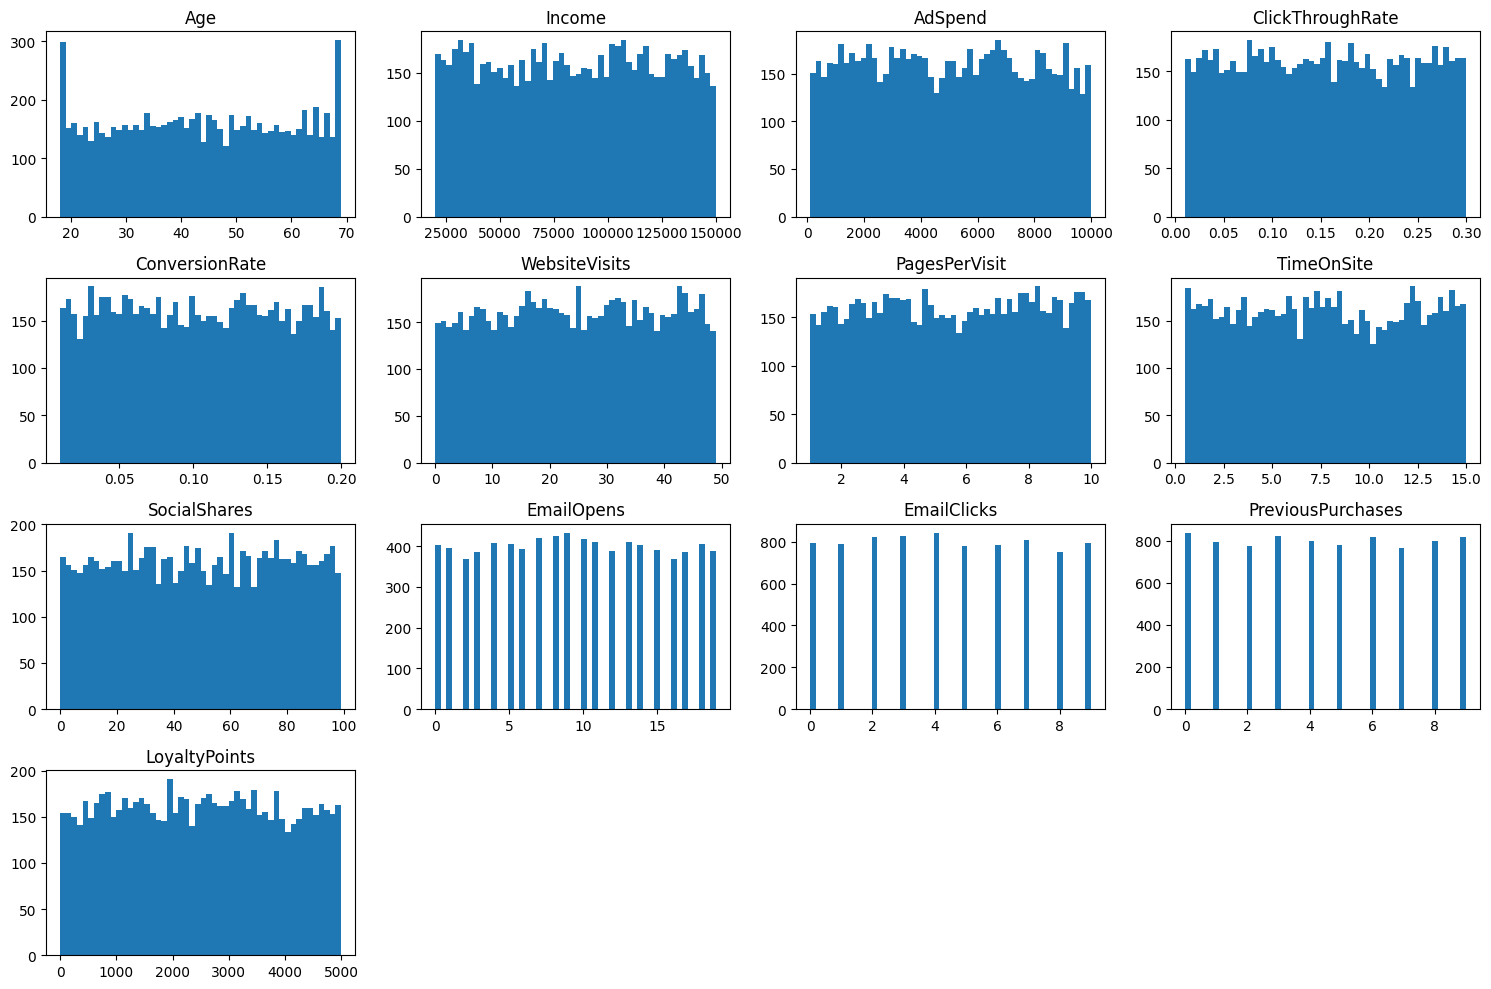

In [20]:
#Studying distributions
columns_to_plot = [col for col in df.columns if col not in ['CustomerID','Gender','CampaignChannel','CampaignType','AdvertisingPlatform','AdvertisingTool','Conversion']]

fig, axes = plt.subplots(4, 4, figsize=(15, 10))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=50)
    axes[i].set_title(col) 

for i in range(len(columns_to_plot), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [21]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(5, 3))  # Set figure size (width=5, height=3 inches)
    
    sns.displot(df[column_name], kde=True, rug=True, stat='percent', height=5, aspect=1.5)
    # displot creates a histogram with KDE curve and rug plot
    # stat='percent' normalizes y-axis to percentage
    # height and aspect control the size of the FacetGrid plot
    
    plt.title(f"Distribution of {column_name}")  # Add title
    
    # Calculate mean and median
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    
    # Add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")
    
    plt.legend()  # Show legend
    
    plt.show()  # Display the plot


<Figure size 500x300 with 0 Axes>

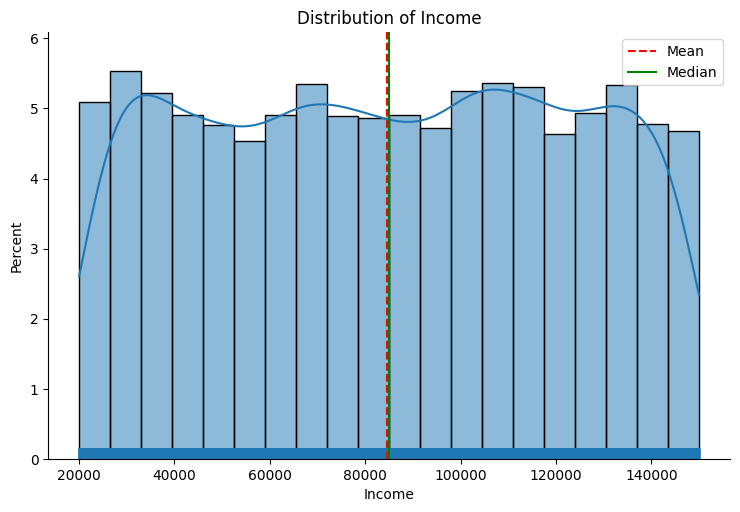

In [22]:
# histogram for income distribution
plot_histogram(df,'Income')

<Figure size 500x300 with 0 Axes>

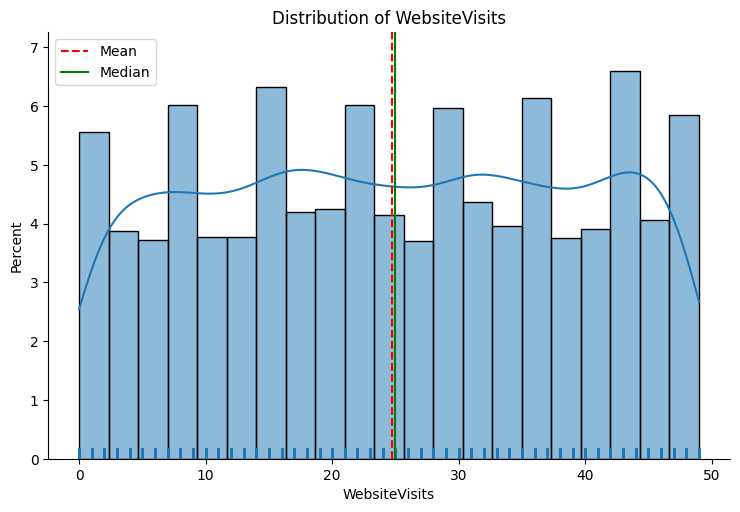

In [23]:
# histogram for website visits 
plot_histogram(df,'WebsiteVisits')

<Figure size 500x300 with 0 Axes>

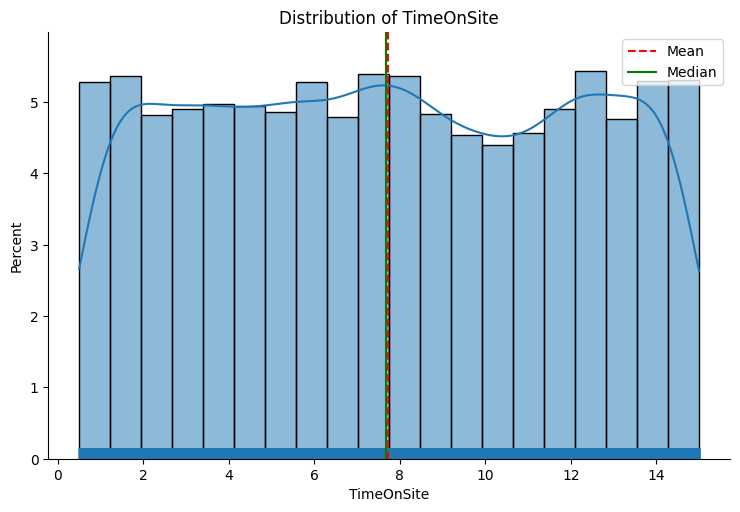

In [24]:
# histogram for time On site 
plot_histogram(df,'TimeOnSite')

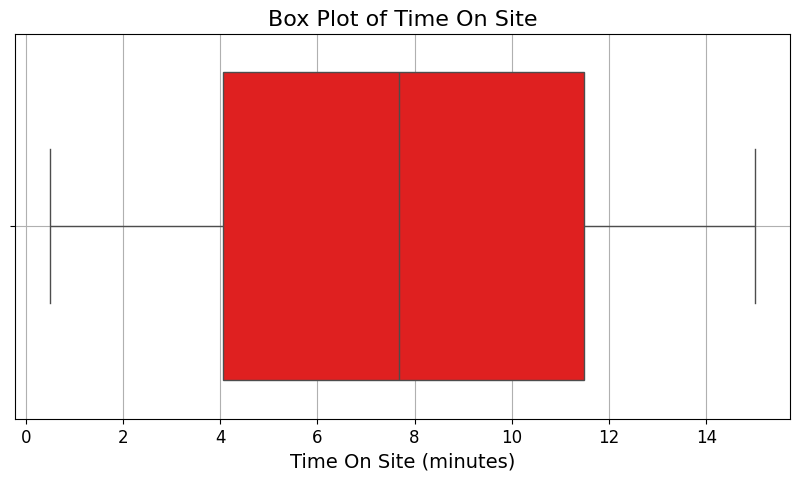

In [25]:
# boxplot to visualize Time on Site 
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['TimeOnSite'], color='red')
plt.title('Box Plot of Time On Site', fontsize=16)
plt.xlabel('Time On Site (minutes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [26]:
# calculating count of returning visitors
returning_visitors = len(df[df['WebsiteVisits'] > 1])
print(f"Number of Returning Visitors: {returning_visitors}")

Number of Returning Visitors: 7700


In [27]:
# calculating count of previous purchases 
repeat_purchase_count = len(df[df['PreviousPurchases'] > 1])
print(f"Number of Repeat Purchases: {repeat_purchase_count}")

Number of Repeat Purchases: 6368


In [28]:
# avg_email_open and avg_emailclicks
avg_email_opens = df['EmailOpens'].mean()
avg_email_clicks = df['EmailClicks'].mean()
print(f"Avg. Email Opens: {avg_email_opens:.2f}")
print(f"Avg. Email Clicks: {avg_email_clicks:.2f}")

Avg. Email Opens: 9.48
Avg. Email Clicks: 4.47


STEP5: Data Preprocessing

In [29]:
# separating the target variable 
X=df.drop(["Conversion"],axis=1)
y=df["Conversion"]
y.value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

In [30]:
# encoding the categorical data using get_dummies
X_encoded = pd.get_dummies(X)

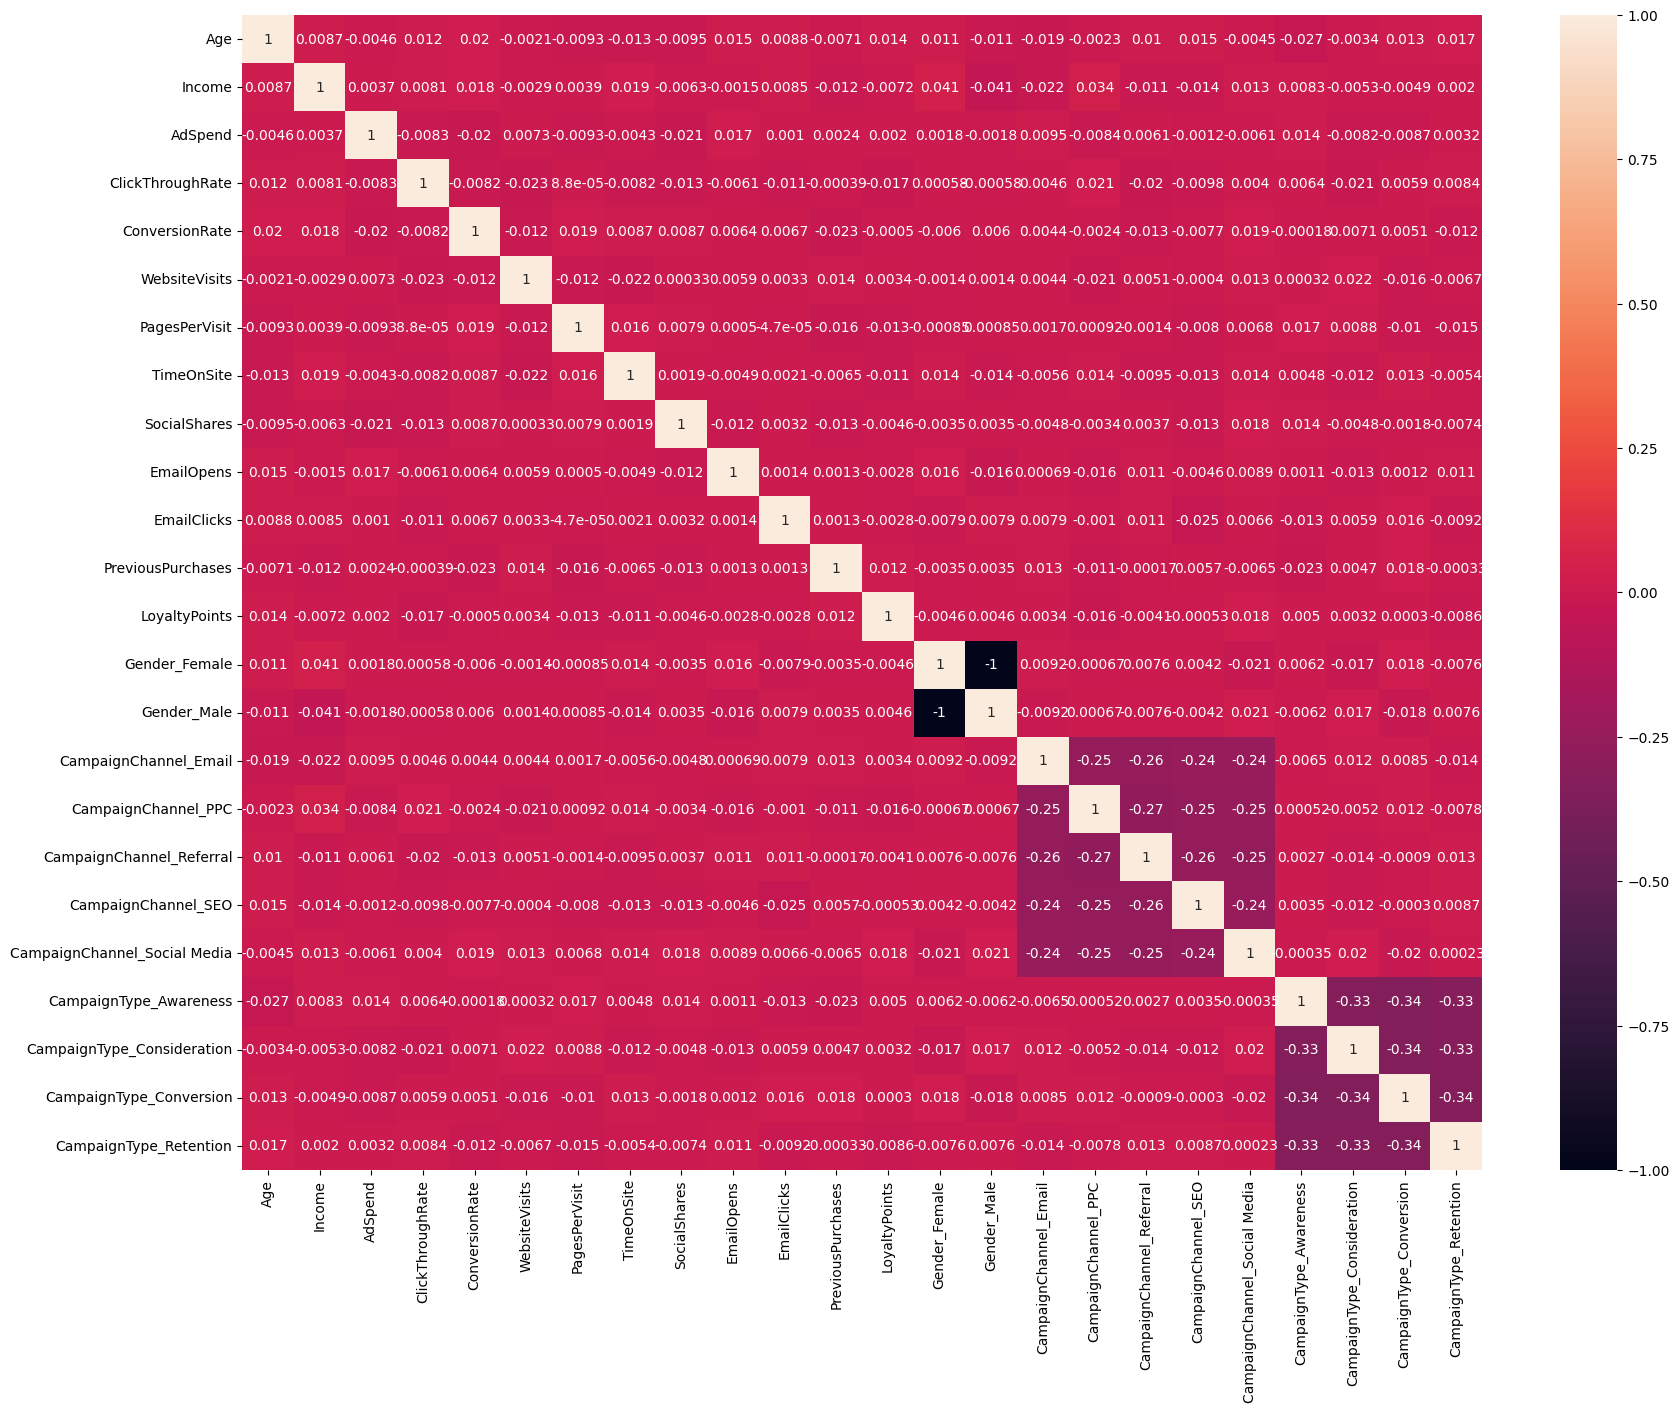

In [33]:
# Plotting heatmap to check correlation between the Data
plt.figure(figsize=(20,15))

corr = X_encoded.corr()
sns.heatmap(corr, annot=True)
plt.show()

STEP6:Model building 

In [34]:
# Splitting the data into train and test using train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [35]:
# Applying Synthetic Minority Oversampling Technique(SMOTE) to bring balance in data 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
new_class_distribution = y_resampled.value_counts()
print(new_class_distribution)

Conversion
1    5606
0    5606
Name: count, dtype: int64


In [36]:
# Creating numerical_cols and categorical_cols to apply Scaling and encoder 
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if col not in numerical_cols]
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints']
Categorical columns: ['Gender_Female', 'Gender_Male', 'CampaignChannel_Email', 'CampaignChannel_PPC', 'CampaignChannel_Referral', 'CampaignChannel_SEO', 'CampaignChannel_Social Media', 'CampaignType_Awareness', 'CampaignType_Consideration', 'CampaignType_Conversion', 'CampaignType_Retention']


In [37]:
# using ColumnTransformer applying RobustScaler and OneHotEncoder to preprocesses the data
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])
X_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
# Save the preprocessor using pickle
with open("preprocessor.pkl", "wb") as f:
    pickle.dump(preprocessor, f)

Model1: Logistic Regression()

In [38]:

# Fit logistic regression on preprocessed training data
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_transformed, y_train)
y_pred_log = model_log.predict(X_test_transformed)
y_proba_log = model_log.predict_proba(X_test_transformed)[:, 1]

# Predict on training data for training accuracy
y_train_pred = model_log.predict(X_transformed)

# Evaluate
print("Accuracy (test):", accuracy_score(y_test, y_pred_log))
print("Accuracy (train):", accuracy_score(y_train, y_train_pred))
print("Precision Score:", precision_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_log))

Accuracy (test): 0.888125
Accuracy (train): 0.8959375
Precision Score: 0.8970873786407767
F1 Score: 0.9393425957302609
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.18      0.28       194
           1       0.90      0.99      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.77      0.58      0.61      1600
weighted avg       0.87      0.89      0.86      1600

Confusion Matrix:
 [[  35  159]
 [  20 1386]]
ROC AUC Score: 0.792498276898711


In [39]:
# Compute the confusion matrix with labels in [1, 0] order
cm_log = confusion_matrix(y_test, y_pred_log, labels=[1, 0])

# Create a labeled DataFrame
df_log_cm = pd.DataFrame(
    data=cm_log,
    index=['Actual 1', 'Actual 0'],
    columns=['Predicted 1', 'Predicted 0']
)

# Display the DataFrame
print(df_log_cm)

          Predicted 1  Predicted 0
Actual 1         1386           20
Actual 0          159           35


Model2: RandomForestClassifier()

In [40]:
# Step 1: Initialize and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_transformed, y_train)

# Step 2: Predict
y_pred_rf = rf_model.predict(X_test_transformed)
y_proba_rf = rf_model.predict_proba(X_test_transformed)[:, 1]

# Step 2.1: Predict on training data for train accuracy
y_train_pred_rf = rf_model.predict(X_transformed)

# Step 3: Evaluate
print("Accuracy (test):", accuracy_score(y_test, y_pred_rf))
print("Accuracy (train):", accuracy_score(y_train, y_train_pred_rf))
print("Precision Score:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

Accuracy (test): 0.88625
Accuracy (train): 1.0
Precision Score: 0.8878326996197718
F1 Score: 0.9390080428954424
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.09      0.16       194
           1       0.89      1.00      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.83      0.54      0.55      1600
weighted avg       0.87      0.89      0.84      1600

Confusion Matrix:
 [[  17  177]
 [   5 1401]]
ROC AUC Score: 0.8274772330659471


In [41]:
# Compute the confusion matrix with labels in [1, 0] order
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[1, 0])

# Create a labeled DataFrame
df_rf_cm = pd.DataFrame(
    data=cm_rf,
    index=['Actual 1', 'Actual 0'],
    columns=['Predicted 1', 'Predicted 0']
)

# Display the DataFrame
print(df_rf_cm)

          Predicted 1  Predicted 0
Actual 1         1401            5
Actual 0          177           17


Model3: XGBClassifier()

In [42]:
# Step 1: Initialize and train the model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_transformed, y_train)

# Step 2: Predict
y_pred_xgb = xgb_model.predict(X_test_transformed)
y_proba_xgb = xgb_model.predict_proba(X_test_transformed)[:, 1]

# Step 2.1: Train predictions for training accuracy
y_train_pred_xgb = xgb_model.predict(X_transformed)

# Step 3: Evaluate
print("Accuracy (test):", accuracy_score(y_test, y_pred_xgb))
print("Accuracy (train):", accuracy_score(y_train, y_train_pred_xgb))
print("Precision Score:", precision_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# Save the trained XGBoost model
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

Accuracy (test): 0.913125
Accuracy (train): 1.0
Precision Score: 0.9243134628265238
F1 Score: 0.9520524318730597
ROC AUC Score: 0.8258952794357027
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.42      0.54       194
           1       0.92      0.98      0.95      1406

    accuracy                           0.91      1600
   macro avg       0.84      0.70      0.75      1600
weighted avg       0.90      0.91      0.90      1600

Confusion Matrix:
 [[  81  113]
 [  26 1380]]


In [43]:
# Compute the confusion matrix with labels in [1, 0] order
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=[1, 0])

# Create a labeled DataFrame
df_xgb_cm = pd.DataFrame(
    data=cm_xgb,
    index=['Actual 1', 'Actual 0'],
    columns=['Predicted 1', 'Predicted 0']
)

# Display the DataFrame
print(df_xgb_cm)

          Predicted 1  Predicted 0
Actual 1         1380           26
Actual 0          113           81


Model4:Support Vector Classifier (SVC)

In [44]:

# Step 1: Initialize and train the model
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_model.fit(X_transformed, y_train)
# Step 2: Predict class labels and probabilities
y_pred_svc = svc_model.predict(X_test_transformed)
y_proba_svc = svc_model.predict_proba(X_test_transformed)[:, 1]  # Probability for class 1

# Step 2.1: Predict on training data
y_train_pred_svc = svc_model.predict(X_transformed)

# Step 3: Evaluate the model
print("Accuracy (test):", accuracy_score(y_test, y_pred_svc))
print("Accuracy (train):", accuracy_score(y_train, y_train_pred_svc))
print("Precision Score:", precision_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Accuracy (test): 0.8875
Accuracy (train): 0.8996875
Precision Score: 0.8904458598726115
F1 Score: 0.9395161290322581
ROC AUC Score: 0.7863501048525465
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.11      0.20       194
           1       0.89      0.99      0.94      1406

    accuracy                           0.89      1600
   macro avg       0.81      0.55      0.57      1600
weighted avg       0.87      0.89      0.85      1600

Confusion Matrix:
 [[  22  172]
 [   8 1398]]


In [45]:
# Compute the confusion matrix with labels in [1, 0] order
cm_svc = confusion_matrix(y_test, y_pred_svc, labels=[1, 0])

# Create a labeled DataFrame
df_svc_cm = pd.DataFrame(
    data=cm_svc,
    index=['Actual 1', 'Actual 0'],
    columns=['Predicted 1', 'Predicted 0']
)

# Display the DataFrame
print(df_svc_cm)

          Predicted 1  Predicted 0
Actual 1         1398            8
Actual 0          172           22


In [46]:

def get_model_scores(y_train, y_test, 
                     y_train_pred, y_test_pred, y_test_proba, 
                     model_name):
    return {
        "Model": model_name,
        "Accuracy (Train)": accuracy_score(y_train, y_train_pred),
        "Accuracy (Test)": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "F1 Score": f1_score(y_test, y_test_pred),
        "ROC AUC": roc_auc_score(y_test, y_test_proba)
    }

# Collect all results in a list
results = []

# XGBoost
results.append(get_model_scores(
    y_train, y_test, y_train_pred_xgb, y_pred_xgb, y_proba_xgb, "XGBoost"
))

# SVC
results.append(get_model_scores(
    y_train, y_test, y_train_pred_svc, y_pred_svc, y_proba_svc, "SVC"
))

# Random Forest
results.append(get_model_scores(
    y_train, y_test, y_train_pred_rf, y_pred_rf, y_proba_rf, "Random Forest"
))

# Logistic Regression
results.append(get_model_scores(
    y_train, y_test, y_train_pred, y_pred_log, y_proba_log, "Logistic Regression"
))

results_df = pd.DataFrame(results)
sorted_df = results_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)
print(sorted_df)

                 Model  Accuracy (Train)  Accuracy (Test)  Precision  \
0              XGBoost          1.000000         0.913125   0.924313   
1                  SVC          0.899687         0.887500   0.890446   
2  Logistic Regression          0.895938         0.888125   0.897087   
3        Random Forest          1.000000         0.886250   0.887833   

   F1 Score   ROC AUC  
0  0.952052  0.825895  
1  0.939516  0.786350  
2  0.939343  0.792498  
3  0.939008  0.827477  


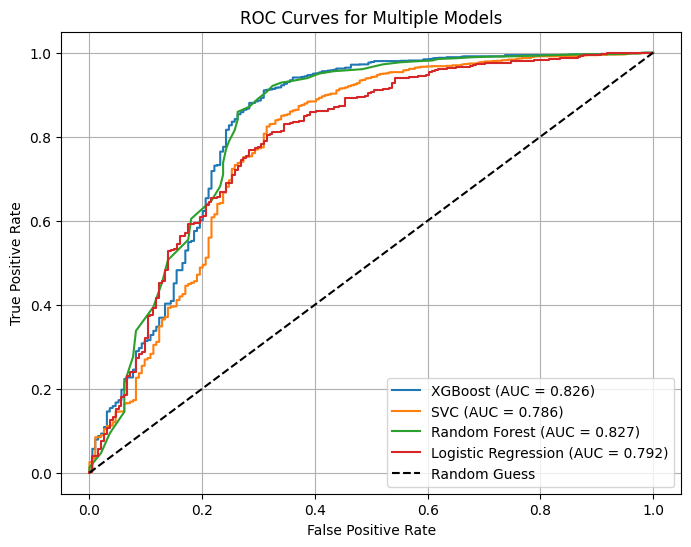

In [47]:
plt.figure(figsize=(8,6))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})')

# SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_proba_svc)
auc_svc = roc_auc_score(y_test, y_proba_svc)
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.3f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = roc_auc_score(y_test, y_proba_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
